# **LOAN APPROVAL PREDICTION**

---



> Predicting loan approval is crucial for financial institutions to assess the risk associated with lending. Accurate predictions can help in making informed decisions, reducing defaults, and ensuring the financial health of the institution.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif

## **Data Loading**

In [2]:
data = pd.read_csv("loan_approval_dataset.csv")

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


## **Display basic information about the dataset**

In [5]:
print(data.info())
print('----------------------------------------------------------------------')
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
----------

## **Data Cleaning**

In [6]:
# Check for missing values
print(data.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [7]:
#Remove leading/trailing spaces in column names
data.columns = data.columns.str.strip()

In [8]:
# Encode categorical variables
le = LabelEncoder()
data['education'] = le.fit_transform(data['education'])
data['self_employed'] = le.fit_transform(data['self_employed'])
data['loan_status'] = le.fit_transform(data['loan_status'])


In [9]:
# Drop the loan_id column as it's not needed for modeling
data = data.drop(['loan_id'], axis=1)

## **Visualization**

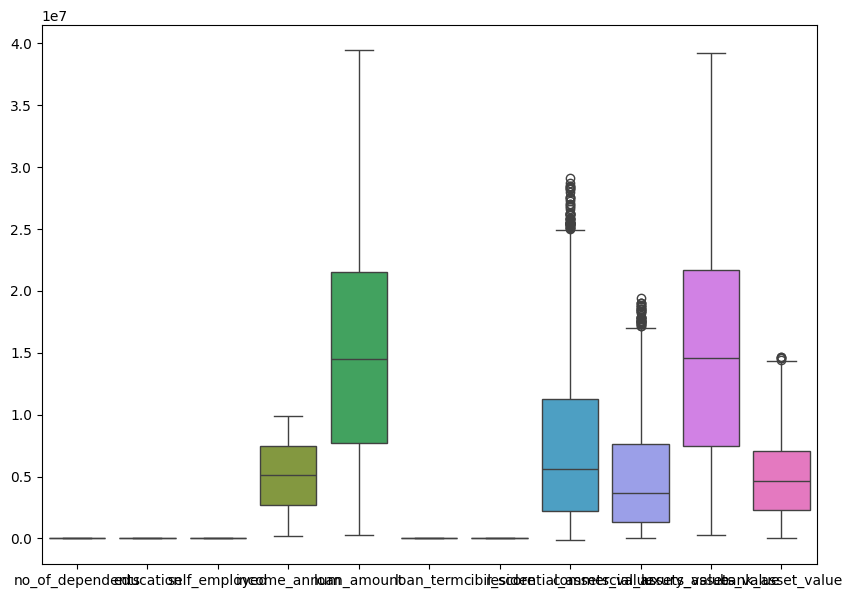

In [10]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=data.drop(columns=['loan_status']))
plt.show()

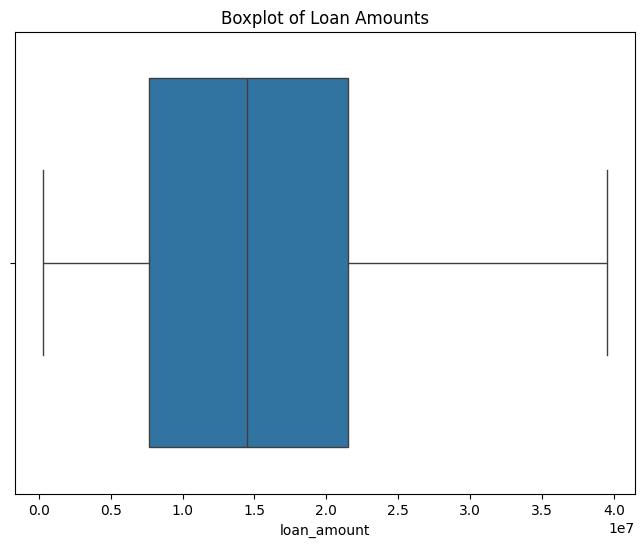

In [11]:
# Data visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="loan_amount")
plt.title("Boxplot of Loan Amounts")
plt.show()

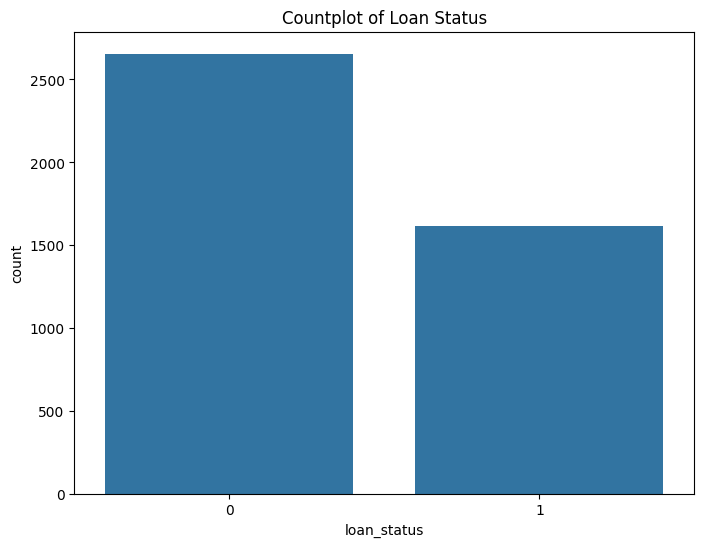

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="loan_status")
plt.title("Countplot of Loan Status")
plt.show()

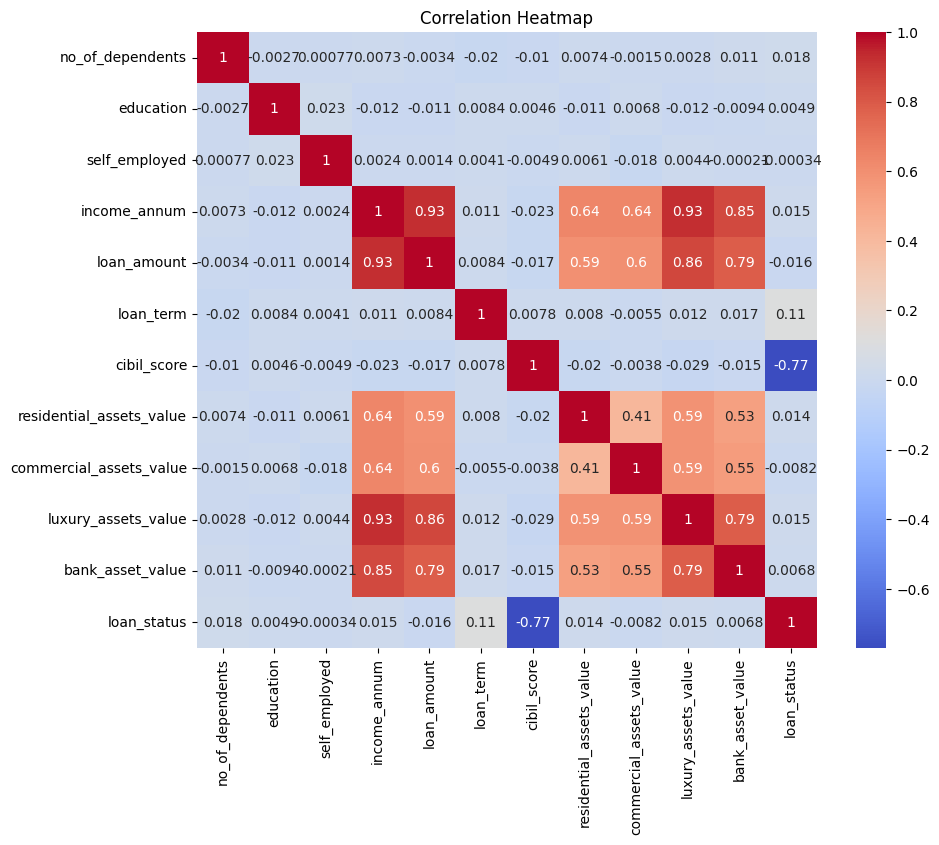

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()


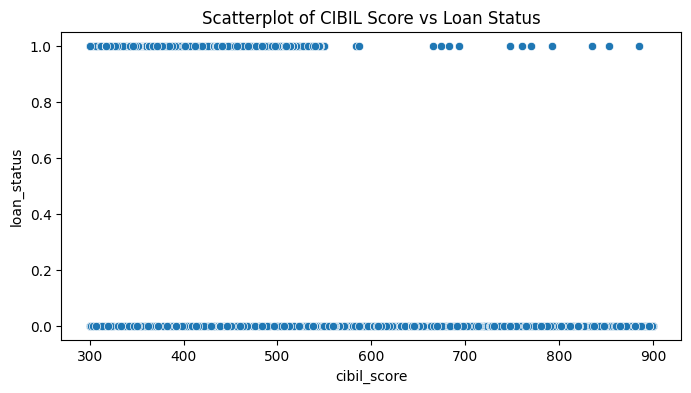

In [14]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='cibil_score', y='loan_status', data=data)
plt.title("Scatterplot of CIBIL Score vs Loan Status")
plt.show()

## **Data preparation and split**

In [15]:
# Split the data into features and target variable
X = data.drop(["loan_status"], axis=1)
y = data["loan_status"]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


## **Model Building**


*   Logistic Regression
*   Decision Tree
*   Random Forest
*   Support Vector Machine (SVM)
*   Gradient Boosting Classifier


### **Logistic Regression**

In [16]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
regpred = reg.predict(x_test)



### **Decision Tree**

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtreepred = dtree.predict(x_test)

### **Random Forest**

In [18]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
rfpred = rf.predict(x_test)

### **Support Vector Machine (SVM)**

In [19]:
svm = SVC()
svm.fit(x_train, y_train)
svmpred = svm.predict(x_test)

### **Gradient Boosting Classifier**

In [20]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gbpred = gb.predict(x_test)

## **Model evaluation**

In [21]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score: ", r2_score(y_test, y_pred))

evaluate_model("Logistic Regression", y_test, regpred)
evaluate_model("Decision Tree", y_test, dtreepred)
evaluate_model("Random Forest", y_test, rfpred)
evaluate_model("Support Vector Machine (SVM)", y_test, svmpred)
evaluate_model("Gradient Boosting Classifier", y_test, gbpred)



Logistic Regression:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       264
           1       0.50      0.01      0.01       163

    accuracy                           0.62       427
   macro avg       0.56      0.50      0.39       427
weighted avg       0.57      0.62      0.48       427

Accuracy:  61.82669789227167
Mean Absolute Error:  0.38173302107728335
Mean Squared Error:  0.38173302107728335
Root Mean Squared Error:  0.6178454669877277
R2 Score:  -0.6174242424242424

Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       264
           1       0.97      0.98      0.97       163

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

Accuracy:  97.89227166276346
Mean Absolute Error:  0.02107728337236534
Mean Squared Error:  0.02107728337236534
Root Mea

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Model Performance Comparison**

In [22]:
LR = accuracy_score(y_test, regpred) * 100
DT = accuracy_score(y_test, dtreepred) * 100
RF = accuracy_score(y_test, rfpred) * 100
SVM = accuracy_score(y_test, svmpred) * 100
GB = accuracy_score(y_test, gbpred) * 100

model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting'],
    'Accuracy': [LR, DT, RF, SVM, GB]
})

print("\nModel Performance Comparison:")
print(model_performance)


Model Performance Comparison:
                 Model   Accuracy
0  Logistic Regression  61.826698
1        Decision Tree  97.892272
2        Random Forest  97.892272
3                  SVM  61.826698
4    Gradient Boosting  97.423888


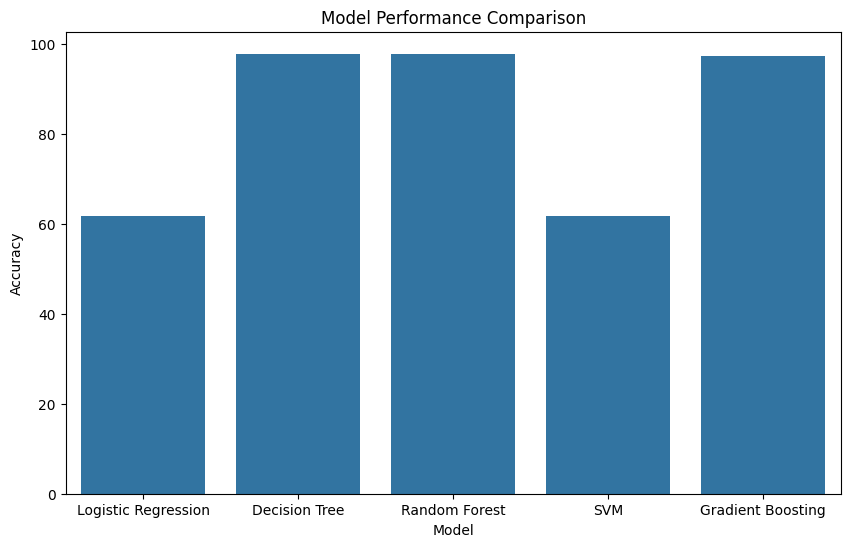

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_performance)
plt.title('Model Performance Comparison')
plt.show()

## **Feature Selection**

In [24]:

selector = SelectKBest(score_func=f_classif, k=10)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features: ", selected_features)

Selected Features:  Index(['no_of_dependents', 'education', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


## **Feature Importance**

In [25]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                     feature  importance
6                cibil_score    0.820893
5                  loan_term    0.057086
4                loan_amount    0.028593
3               income_annum    0.018014
9        luxury_assets_value    0.016706
7   residential_assets_value    0.016062
8    commercial_assets_value    0.015466
10          bank_asset_value    0.015228
0           no_of_dependents    0.007076
2              self_employed    0.002512
1                  education    0.002364


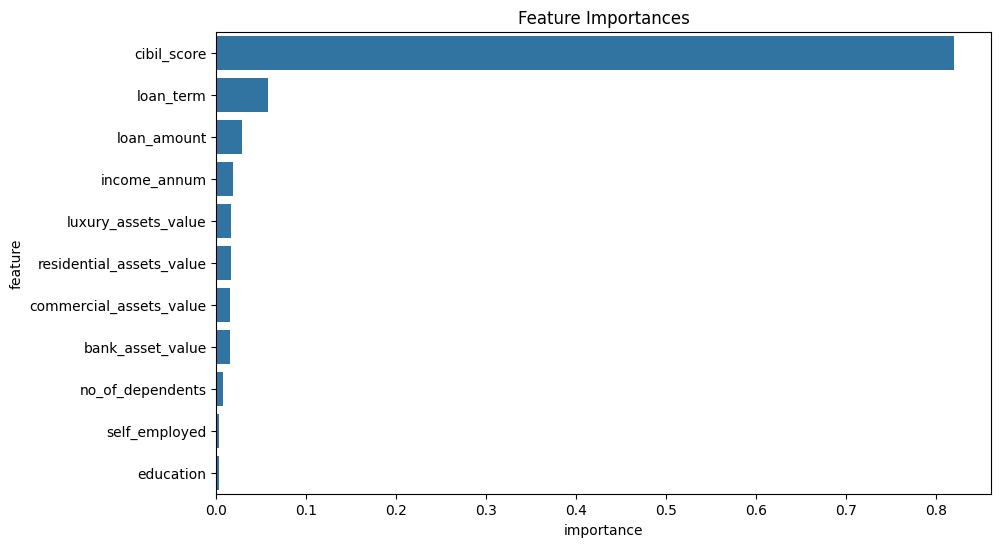

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# **Conclusion**
---


* The loan approval prediction project successfully analyzed the dataset and built five machine learning models to predict whether a loan application will be approved or rejected.

* The models evaluated include Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and Gradient Boosting Classifier.

* Each model's performance was assessed using various evaluation metrics, including accuracy, mean absolute error, mean squared error, root mean squared error, and R2 score.

* Based on the evaluation results, the **Random Forest model** demonstrated the **highest accuracy of 97.66%** in predicting loan approval outcomes.

* The feature importance analysis revealed that the **CIBIL score** is the most influential factor in predicting loan approval, followed by loan term, loan amount, and income.
